In [1]:
# import usefull libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data

df = pd.read_csv('marketing_analysis.csv', skiprows = 2)

df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
# split and drop come columns

df['job'] = df['jobedu'].apply(lambda x: x.split(',')[0])
df['education'] = df['jobedu'].apply(lambda x: x.split(',')[1])

df.drop(['customerid','jobedu'], axis = 1, inplace = True)

df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [4]:
# check missing values

df.isnull().sum()

df.dropna(subset = 'age',inplace = True)

df.isna().sum()

month_mode = df['month'].mode()[0]

df['month'].fillna(month_mode, inplace = True)

df.dropna(subset = 'response',inplace = True)

df.isna().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

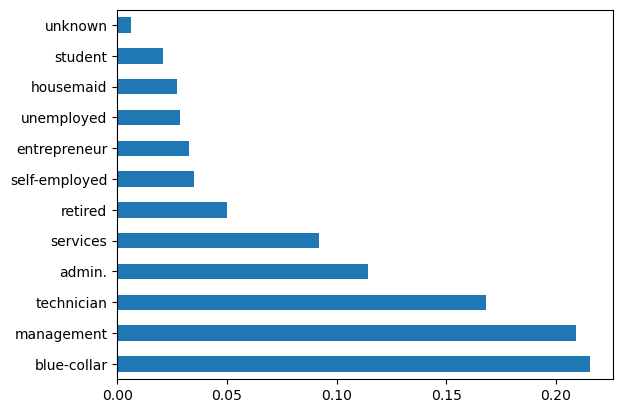

In [5]:
# plot bar chart with categorical column job

df.job.value_counts(normalize = True)

df.job.value_counts(normalize = True).plot.barh()
plt.show()

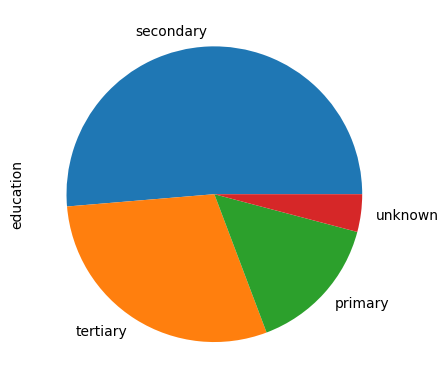

In [6]:
# create pie chart of education column

df.education.value_counts(normalize = True)

df.education.value_counts(normalize = True).plot.pie()
plt.show()

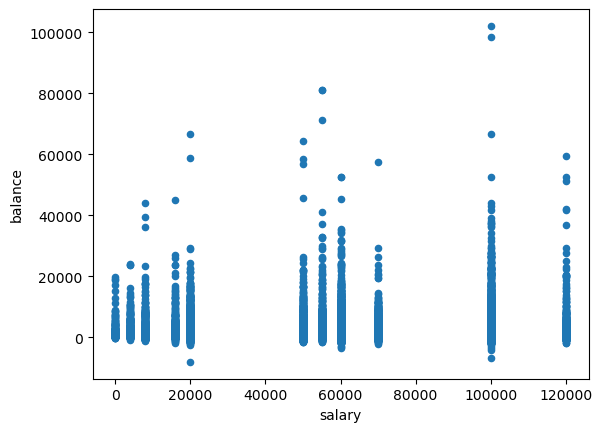

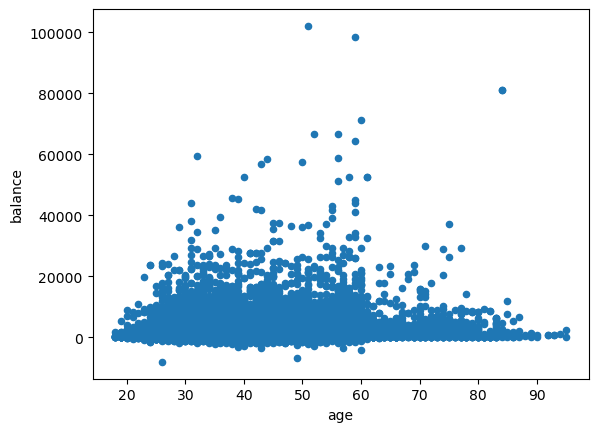

In [7]:
# scatterplot of two numeric data

df.plot.scatter(x = 'salary',y = 'balance')
plt.show()

df.plot.scatter(x = 'age',y = 'balance')
plt.show()

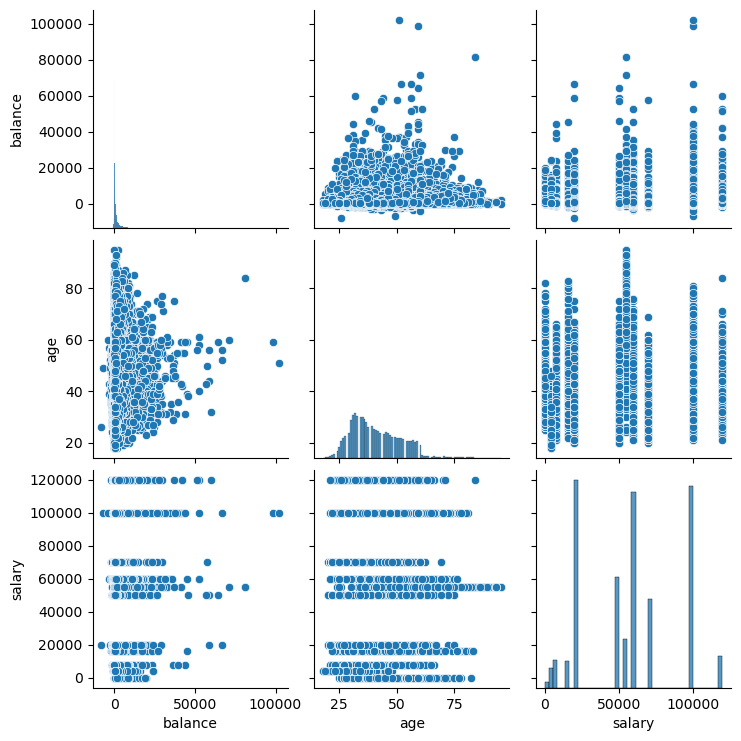

In [8]:
# create a pairplot

sns.pairplot(data = df, vars = ['balance','age','salary'])
plt.show()

<Axes: >

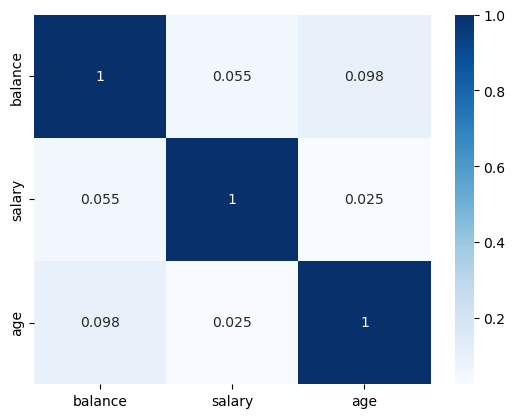

In [9]:
# correlation matrix

df[['balance','salary','age']].corr()

sns.heatmap(df[['balance','salary','age']].corr(), annot = True, cmap = 'Blues')

In [10]:
# categorical-numeric analysis (mean and median)

df.groupby('response')['salary'].mean()[0]

#df.groupby('response')['salary'].median()

56769.51048249574

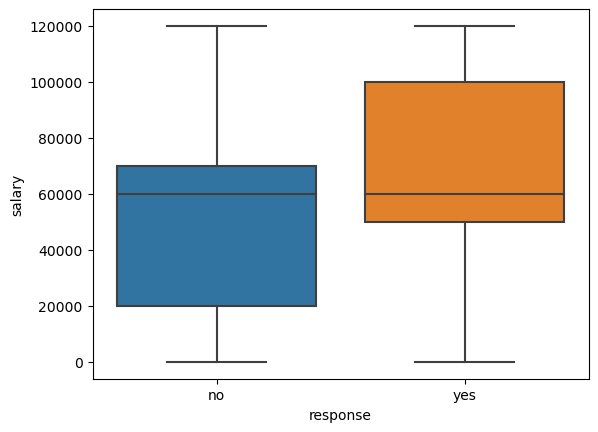

In [11]:
# plot boxplot for salary and response

sns.boxplot(x = df.response,y = df.salary)
plt.show()

In [12]:
# categorical-categorical analysis
# create a new column woth substitute for yes and no
df['response_rate'] = np.where(df['response'] == 'yes',1, 0)

df.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

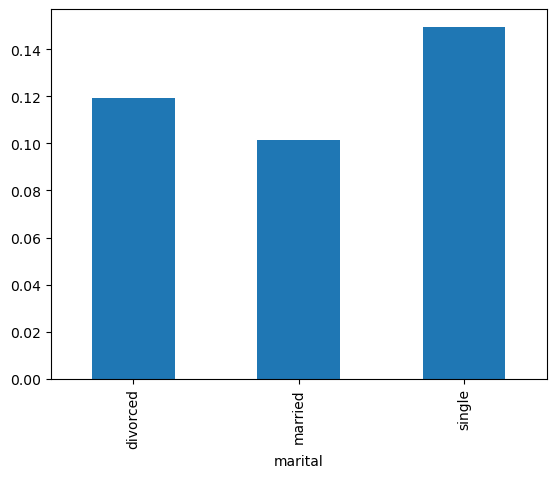

In [13]:
# count values by marital status

df.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

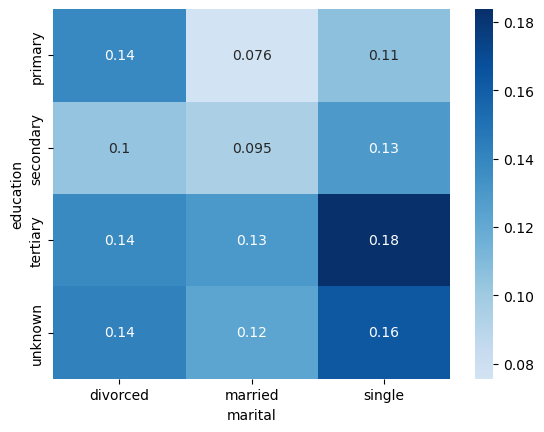

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


In [14]:
# multivariate analysis
# create pivot table and heatmap

pivot = pd.pivot_table(data = df, index = 'education',columns = 'marital',values = 'response_rate')

sns.heatmap(pivot, annot = True, cmap = 'Blues', center = 0.117)
plt.show()

pivot

marital   education
divorced  primary        749
          secondary     2810
          tertiary      1470
          unknown        169
married   primary       5238
          secondary    13756
          tertiary      7032
          unknown       1159
single    primary        852
          secondary     6614
          tertiary      4784
          unknown        528
Name: response_rate, dtype: int64